In [144]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import os
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms import ToTensor
import random

In [28]:
img = cv2.imread('data/INGT103E_00001.jpg')

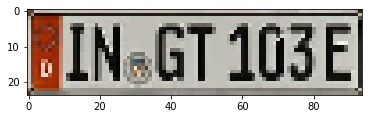

In [13]:
plt.imshow(cv2.resize(img, (94, 24)))

In [11]:
img.shape

(62, 278, 3)

In [29]:
img = cv2.resize(img, (94, 24))

In [30]:
for i in range(200):
    cv2.imwrite(f'data/INGT103E_{i:05}.jpg', img)

In [15]:
from torch.utils.data import Dataset, DataLoader

In [31]:
class LicensePlateDataset(Dataset):
    def __init__(self, path) -> None:
        super().__init__()
        self.path = pathlib.Path(path)
        self.imgs = list(self.path.iterdir())

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, index):
        img = Image.open(self.imgs[index])
        img = ToTensor()(img)
        label = self.imgs[index].stem.split('_')[0]

        return img, label

In [32]:
lpd = LicensePlateDataset('data')
img, label = next(iter(lpd))
img.size(), label

(torch.Size([3, 24, 94]), 'INGT103E')

In [6]:
from pathlib import Path


for file in Path('data').iterdir():
    if '.' in file.name:
        # print(file.name)
        # print(Path('data') / f'{file.name[:-4].replace(".", "")}.jpg')
        try:
            file.rename(Path('data') / f'{file.name[:-4].replace(".", "")}.jpg')
        except FileExistsError:
            file.unlink()

In [28]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

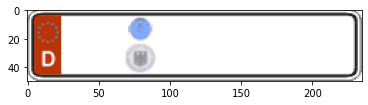

In [58]:
img = Image.open(r"C:\Users\fnowo\Downloads\license_plate_template_de.png")
img = cv2.imread(r"C:\Users\fnowo\Downloads\license_plate_template_de.png")
height_range = (7, 42)
locs = [
    (25, 46),
    (46, 67),
    (93, 113),
    (115, 134),
    (144, 163),
    (165, 184),
    (186, 205),
    (207, 226),
]
img[7:42, 25:67, :] = np.ones((35, 42, 3)) * 255
img[7:42, 93:135, :] = np.ones((35, 42, 3)) * 255
img[7:42, 144:226, :] = np.ones((35, 82, 3)) * 255
plt.imshow(img)

In [59]:
cv2.imwrite(r'C:\Users\fnowo\Desktop\#Projects\lprnet\templates\template_d_white.jpg', img)

True

In [99]:
from PIL import Image, ImageFont, ImageDraw
import random
import numpy as np

In [154]:
CHARS = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
    'U', 'V', 'W', 'X', 'Y', 'Z', ' '
]

# weights = [1 for ch in CHARS]
# weights[-1] = 2

locs = [
    (25, 46),
    (46, 67),
    (93, 113),
    (115, 134),
    (144, 163),
    (165, 184),
    (186, 205),
    (207, 226),
]
len(CHARS)

37

In [151]:
font = ImageFont.truetype(r"C:\Users\fnowo\Desktop\#Projects\lprnet\templates\FE Mittelschrift Regular\FE Mittelschrift Regular.otf", 42)

In [156]:
dataset_path = Path(r'C:\Users\fnowo\Desktop\#Projects\lprnet\generated_dataset\test')

for i in range(2000):
    img = Image.open(r'C:\Users\fnowo\Desktop\#Projects\lprnet\templates\template_d_white.jpg')
    # text = np.ones()
    text = random.choices(CHARS, k=8)#, weights=weights)
    # for let in text:
    #     CHARS.remove(let)
    draw = ImageDraw.Draw(img)
    draw.text((locs[0][0], 6), text[0], font=font, fill=(0, 0, 0))
    draw.text((locs[1][0], 6), text[1], font=font, fill=(0, 0, 0))
    draw.text((locs[2][0], 6), text[2], font=font, fill=(0, 0, 0))
    draw.text((locs[3][0], 6), text[3], font=font, fill=(0, 0, 0))
    draw.text((locs[4][0], 6), text[4], font=font, fill=(0, 0, 0))
    draw.text((locs[5][0], 6), text[5], font=font, fill=(0, 0, 0))
    draw.text((locs[6][0], 6), text[6], font=font, fill=(0, 0, 0))
    draw.text((locs[7][0], 6), text[7], font=font, fill=(0, 0, 0))
    text = [ch for ch in text if ch != ' ']
    file_name = f'{"".join(text)}_{i:05d}.jpg'
    file_path = dataset_path / file_name
    img.save(file_path)

# plt.imshow(img)


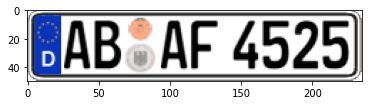

In [153]:
im = Image.open(r"C:\Users\fnowo\Downloads\license_plate_template_de.png")
plt.imshow(im)

In [118]:
for i in range(20):
    print(random.choices(CHARS, k=8, weights=weights))


['K', 'M', 'A', 'D', '1', 'B', '4', ' ']
['C', '1', 'D', 'G', 'J', 'K', 'N', 'N']
['T', '5', 'Q', '9', '1', 'G', 'Q', 'Q']
['9', 'M', 'W', '2', '7', 'W', '5', 'U']
['D', 'L', 'B', 'R', 'O', 'G', 'K', 'N']
['E', '3', 'I', '7', '0', '0', ' ', 'C']
['F', '7', 'M', 'F', 'J', 'D', 'N', 'F']
['1', 'G', '5', '5', 'B', 'Y', '4', 'O']
['B', 'R', '3', '5', 'B', 'W', 'N', 'O']
['L', ' ', 'J', 'P', 'F', 'D', 'W', 'R']
['0', 'F', 'P', ' ', '0', '9', '8', 'J']
['R', 'G', 'U', 'F', 'C', 'J', '3', ' ']
['F', 'B', 'O', 'I', '1', 'X', 'H', 'T']
[' ', 'J', 'W', ' ', '6', 'V', 'V', 'Z']
['D', 'M', 'K', 'F', 'M', '2', 'R', 'A']
['S', 'S', '1', 'C', 'I', 'P', 'Q', 'I']
['8', 'V', 'U', 'S', 'Q', ' ', 'J', ' ']
['L', 'K', 'R', 'J', 'G', 'H', 'G', 'R']
['D', '3', ' ', 'D', 'Q', 'K', '4', 'W']
['Y', 'D', '1', 'U', 'X', 'E', '7', '1']


In [145]:
CHARS2 = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
    'U', 'V', 'W', 'X', 'Y', 'Z', ' ', ' '
] * 2

In [136]:
letter_locations = [20, 46, 72, 108, 132, 156, 180, 204]
font = ImageFont.truetype(r"templates\arklatrs-webfont.ttf", 43)

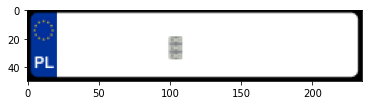

In [137]:
# img = cv2.imread('templates/template_pl.png')
img = Image.open('templates/template_pl.png')
# plt.figure(figsize=(16, 16))
plt.imshow(img)

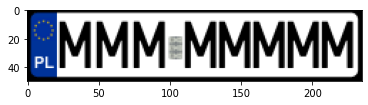

In [138]:
text = 'MMMMMMMM'
# text = 'IIIIIIII'
draw = ImageDraw.Draw(img)
draw.text((letter_locations[0], 8), text[0], font=font, fill=(0, 0, 0))
draw.text((letter_locations[1], 8), text[1], font=font, fill=(0, 0, 0))
draw.text((letter_locations[2], 8), text[2], font=font, fill=(0, 0, 0))
draw.text((letter_locations[3], 8), text[3], font=font, fill=(0, 0, 0))
draw.text((letter_locations[4], 8), text[4], font=font, fill=(0, 0, 0))
draw.text((letter_locations[5], 8), text[5], font=font, fill=(0, 0, 0))
draw.text((letter_locations[6], 8), text[6], font=font, fill=(0, 0, 0))
draw.text((letter_locations[7], 8), text[7], font=font, fill=(0, 0, 0))
plt.imshow(img)

In [146]:
CHARS = [
    ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
    'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 
    'U', 'V', 'W', 'X', 'Y', 'Z',
]

letter_locations = [20, 46, 72, 108, 132, 156, 180, 204]
font = ImageFont.truetype(r"templates\arklatrs-webfont.ttf", 43)

In [147]:
def generate_img(dataset_path, id_):
    img = Image.open(r'templates\template_pl.png')
    text = random.choices(CHARS, k=8)
    draw = ImageDraw.Draw(img)
    draw.text((letter_locations[0], 8), text[0], font=font, fill=(0, 0, 0))
    draw.text((letter_locations[1], 8), text[1], font=font, fill=(0, 0, 0))
    draw.text((letter_locations[2], 8), text[2], font=font, fill=(0, 0, 0))
    draw.text((letter_locations[3], 8), text[3], font=font, fill=(0, 0, 0))
    draw.text((letter_locations[4], 8), text[4], font=font, fill=(0, 0, 0))
    draw.text((letter_locations[5], 8), text[5], font=font, fill=(0, 0, 0))
    draw.text((letter_locations[6], 8), text[6], font=font, fill=(0, 0, 0))
    draw.text((letter_locations[7], 8), text[7], font=font, fill=(0, 0, 0))
    text = [ch for ch in text if ch != ' ']
    file_name = f'{"".join(text)}_{id_:05d}.jpg'
    file_path = dataset_path / file_name
    img.save(file_path)    

In [148]:
train_samples = 8000
test_samples = 2000

train_dataset_path = Path(r'generated_dataset\train')
test_dataset_path = Path(r'generated_dataset\test')

if not train_dataset_path.exists():
    train_dataset_path.mkdir()

if not test_dataset_path.exists():
    test_dataset_path.mkdir()    

for i in range(train_samples):
    generate_img(train_dataset_path, i)

for i in range(test_samples):
    generate_img(test_dataset_path, i)    